 Clustering-based outlier detection is a category of outlier detection methods that leverage the concept of grouping similar data points into clusters. The underlying idea is that outliers, being dissimilar to the majority of the data, might not fit well into any cluster or form small, distinct clusters themselves. Here's an overview of clustering-based outlier detection:

In [ ]:
# data wrangling
import pandas as pd #visualization
import matplotlib.pyplot as plt #algorithm
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.pipeline import make_pipeline

In [ ]:
from google.colab import drive

# Mount Google Drive
df = pd.read_csv("/content/data.txt")

In [ ]:
column_names = ["date", "time", "epoch", "moteid", "temperature", "humidity", "light", "voltage"]

In [ ]:
file_path = "/content/data.txt"
df = pd.read_csv(file_path, header=None, names=column_names, delim_whitespace=True)

In [ ]:
df.head()

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1,19.1750,38.83790,45.08,2.69964


In [ ]:
print(df.columns)

Index(['date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light',
       'voltage'],
      dtype='object')


In [ ]:
features = ["temperature", "humidity", "light", "voltage"]
data = df[features]

In [ ]:
subset_size = 30  # Adjust the size based on your computational resources
data_subset = data.sample(n=subset_size, random_state=42)

In [ ]:
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values with the mean
    StandardScaler(),  # Standardize the data
    DBSCAN(eps=0.5, min_samples=5)  # Apply DBSCAN
)

In [ ]:
labels_subset = pipeline.fit_predict(data_subset)

In [ ]:
data_subset_labeled = data_subset.copy()
data_subset_labeled['cluster'] = labels_subset

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)  # Assuming 2 clusters for demonstration
labels = kmeans.fit_predict(data_subset)

print("silhouette_avg:",silhouette_score(data_subset, labels), "db_index:",davies_bouldin_score(data_subset, labels))

silhouette_avg: 0.704054129301148 db_index: 0.4281957930254096


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


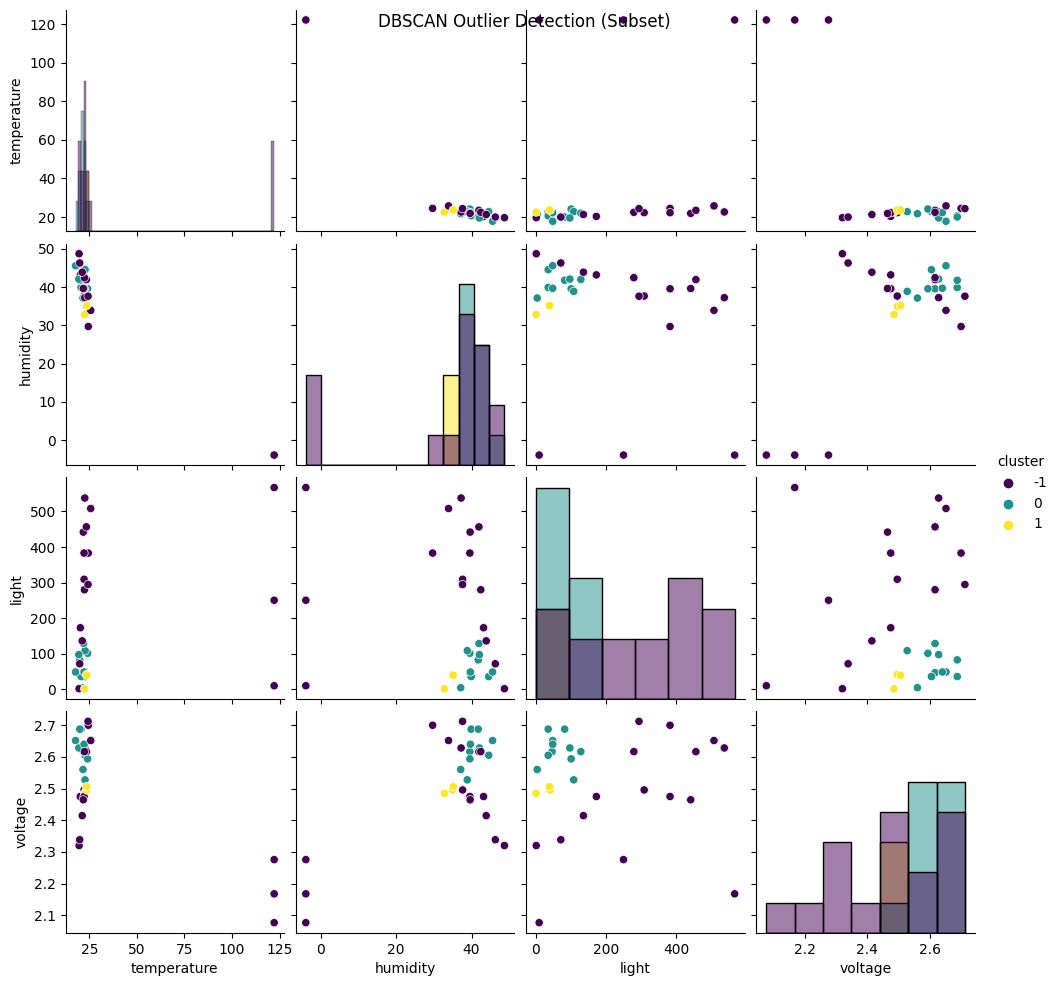

In [ ]:
sns.pairplot(data_subset_labeled, hue='cluster', palette='viridis', diag_kind='hist')
plt.suptitle("DBSCAN Outlier Detection (Subset)")
plt.show()

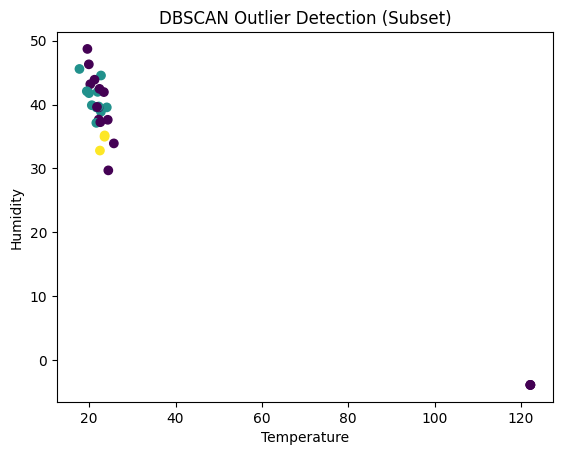

In [ ]:
plt.scatter(data_subset["temperature"], data_subset["humidity"], c=labels_subset, cmap='viridis')
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("DBSCAN Outlier Detection (Subset)")
plt.show()

Number of outliers (Subset Size 15): 15


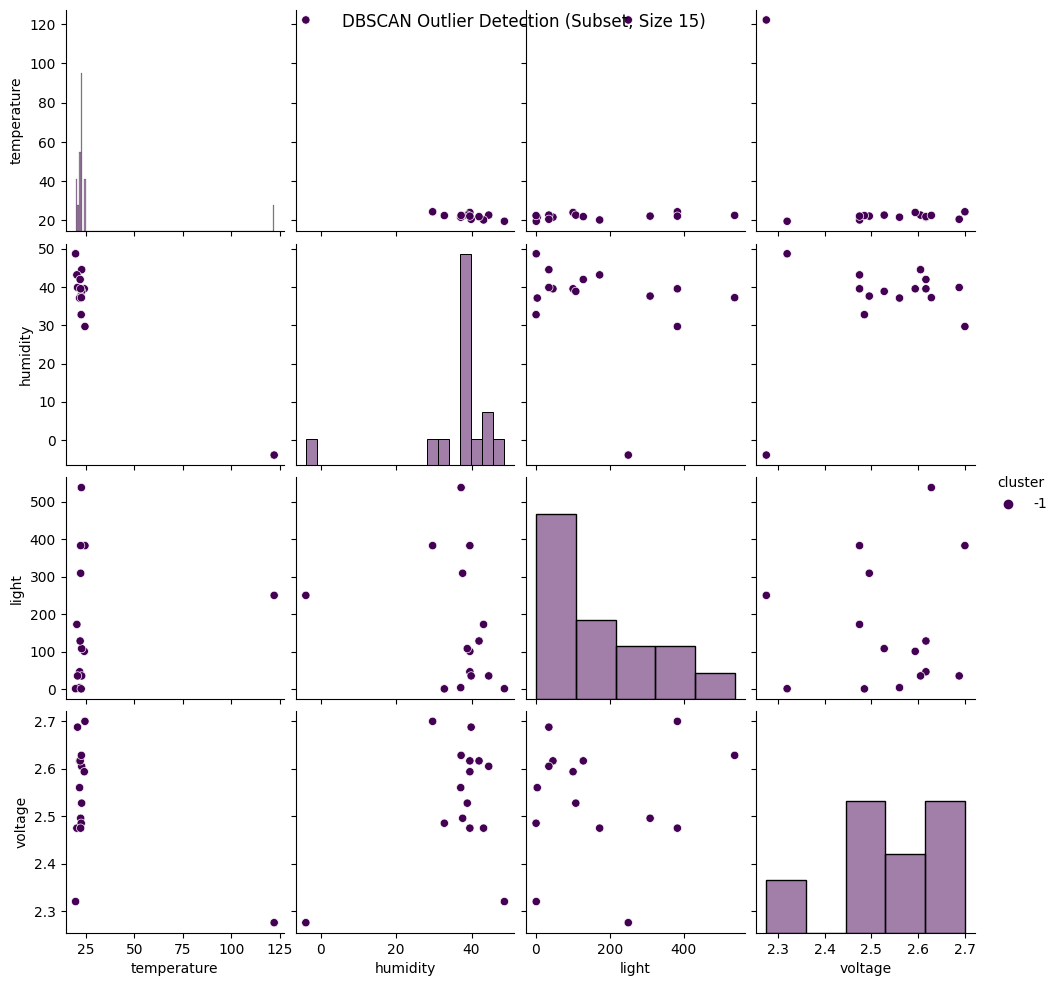

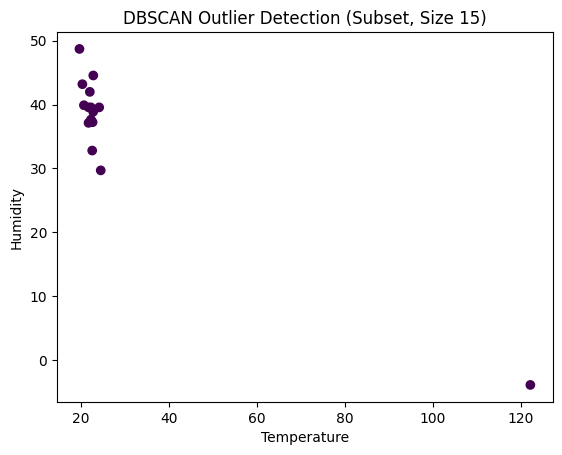

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_avg: 0.6728173790163573 db_index: 0.44360653158736923
Number of outliers (Subset Size 30): 16


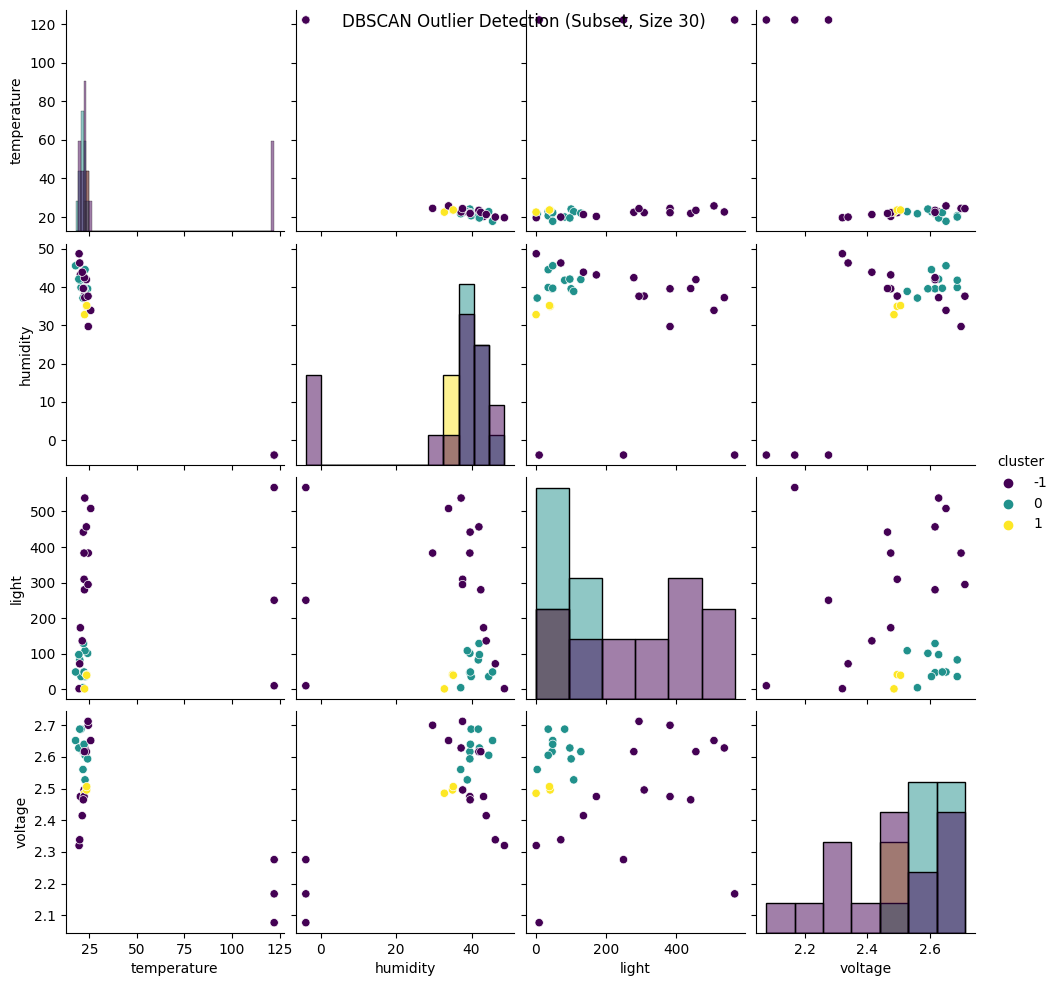

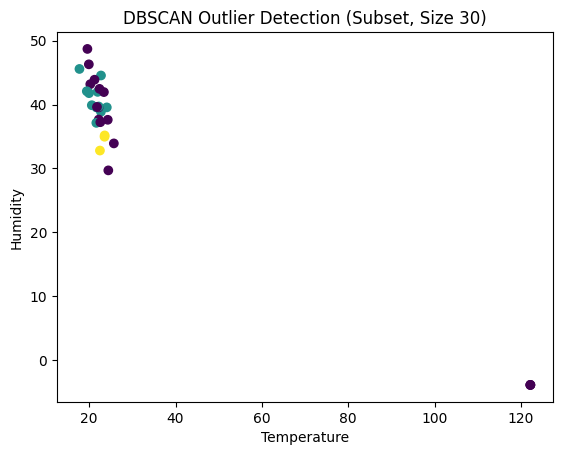

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


silhouette_avg: 0.704054129301148 db_index: 0.4281957930254096
Number of outliers (Subset Size 45): 27


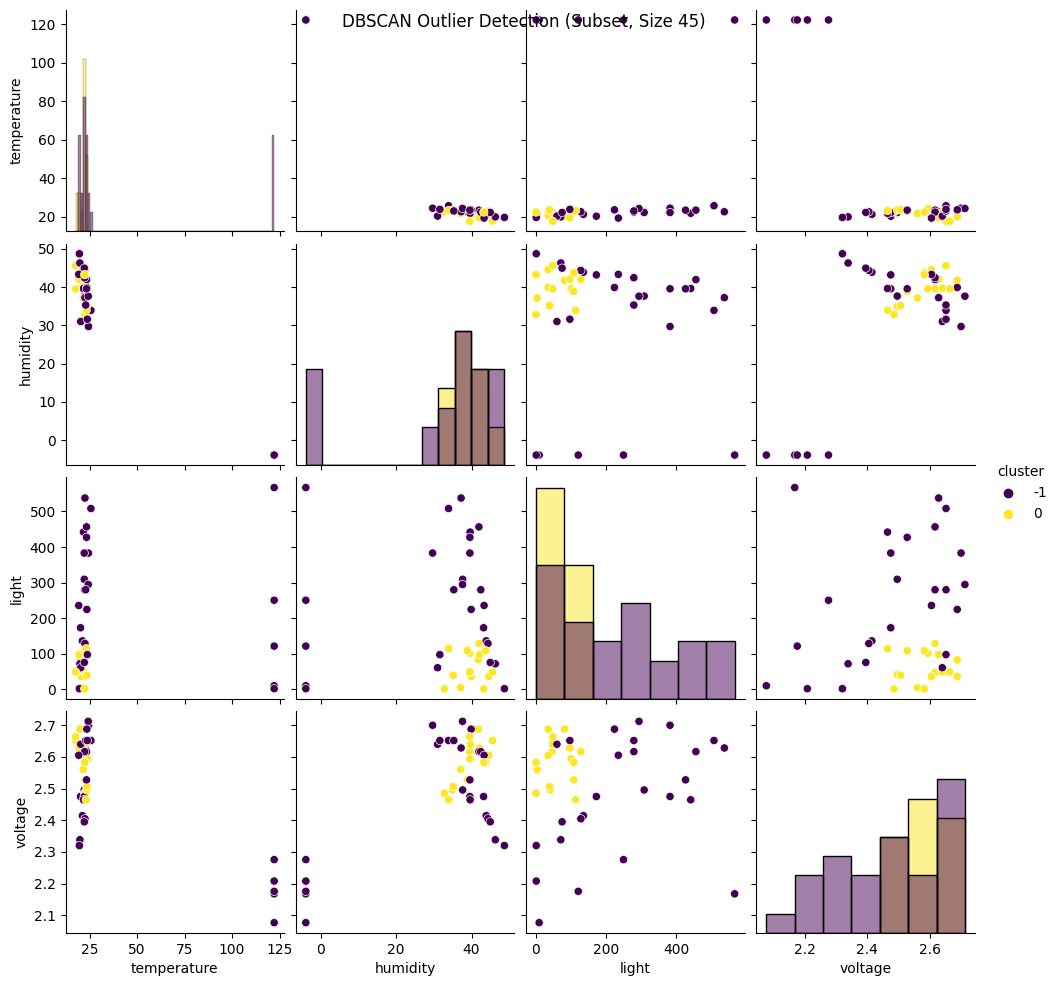

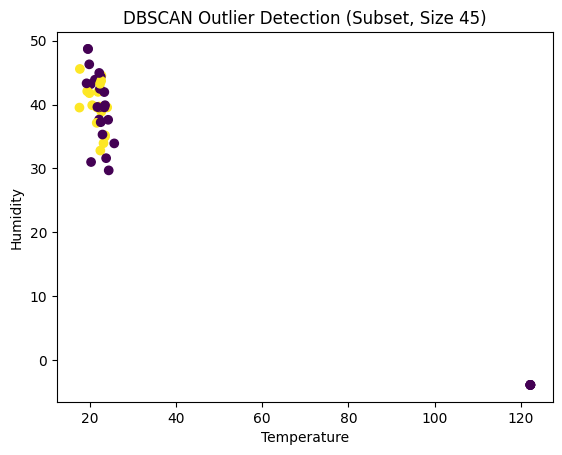

silhouette_avg: 0.6704917874515709 db_index: 0.49753140222769454
[15, 16, 27]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline


def run_dbscan_subset(subset_size):

    data_subset = data.sample(n=subset_size, random_state=42)
    pipeline = make_pipeline(
        SimpleImputer(strategy='mean'),  # Impute missing values with the mean
        StandardScaler(),  # Standardize the data
        DBSCAN(eps=0.5, min_samples=5)  # Apply DBSCAN
    )
    labels_subset = pipeline.fit_predict(data_subset)

    # Count the number of outliers (label -1)
    num_outliers = len(labels_subset[labels_subset == -1])
    print(f"Number of outliers (Subset Size {subset_size}): {num_outliers}")

    data_subset_labeled = data_subset.copy()
    data_subset_labeled['cluster'] = labels_subset

    sns.pairplot(data_subset_labeled, hue='cluster', palette='viridis', diag_kind='hist')
    plt.suptitle(f"DBSCAN Outlier Detection (Subset, Size {subset_size})")
    plt.show()

    plt.scatter(data_subset["temperature"], data_subset["humidity"], c=labels_subset, cmap='viridis')
    plt.xlabel("Temperature")
    plt.ylabel("Humidity")
    plt.title(f"DBSCAN Outlier Detection (Subset, Size {subset_size})")
    plt.show()

    from sklearn.metrics import silhouette_score, davies_bouldin_score

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2)  # Assuming 2 clusters for demonstration
    labels = kmeans.fit_predict(data_subset)

    print("silhouette_avg:",silhouette_score(data_subset, labels), "db_index:",davies_bouldin_score(data_subset, labels))
    return num_outliers

# Define the subset sizes you want to run
subset_sizes = [15, 30, 45]

# Run DBSCAN for each subset size
outlier = []
for size in subset_sizes:
    outlier.append(run_dbscan_subset(size))

print(outlier)

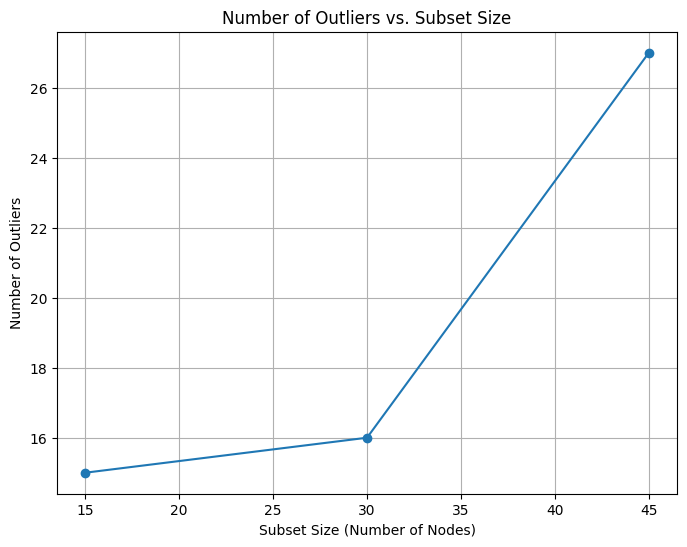

In [ ]:
subset_sizes = [15, 30, 45]

# Plot a graph of number of outliers versus subset size (number of nodes)
plt.figure(figsize=(8, 6))
plt.plot(subset_sizes, outlier, marker='o', linestyle='-')
plt.xlabel("Subset Size (Number of Nodes)")
plt.ylabel("Number of Outliers")
plt.title("Number of Outliers vs. Subset Size")
plt.grid(True)
plt.show()

Agglomerative Clustering


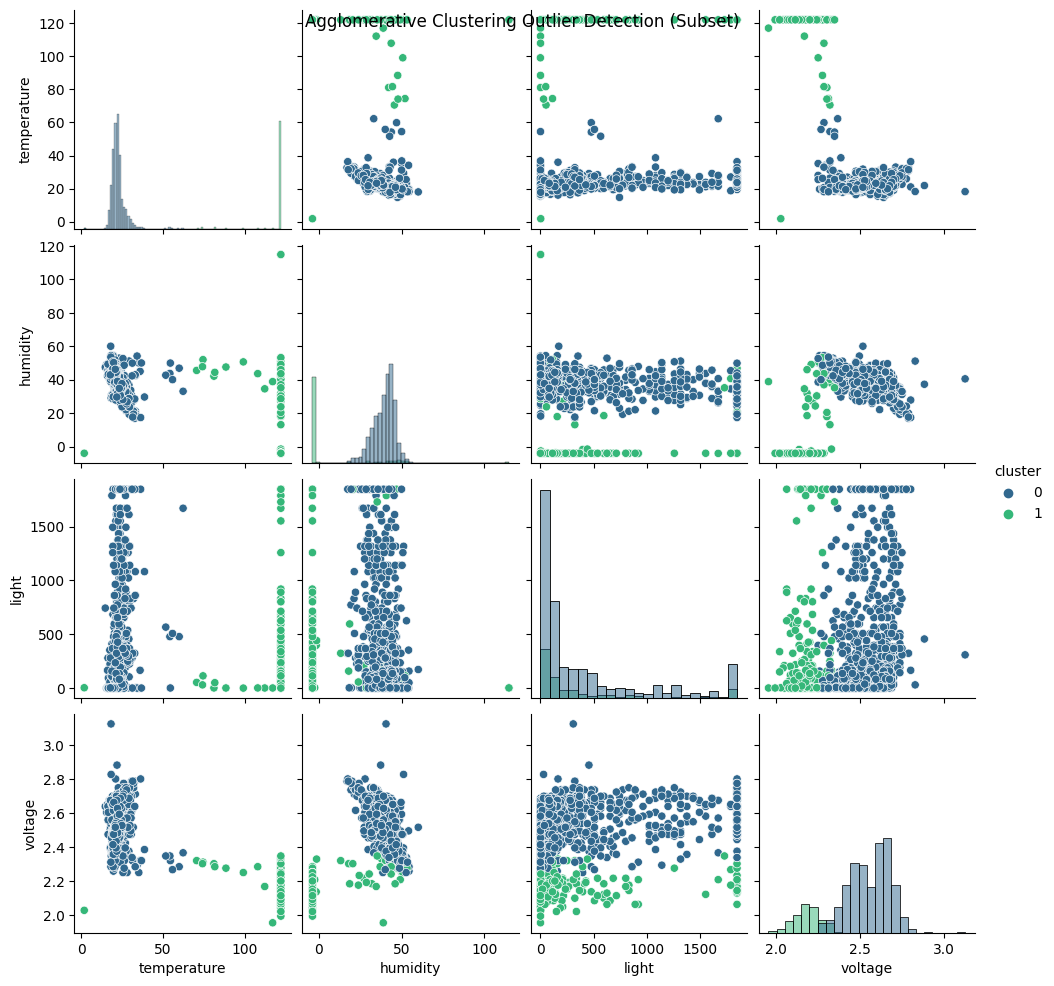

In [ ]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Manually assign column names
column_names = ["date", "time", "epoch", "moteid", "temperature", "humidity", "light", "voltage"]

# Read the data without header and with specified column names
file_path = '/content/gdrive/MyDrive/data.txt'
df = pd.read_csv(file_path, header=None, names=column_names, delim_whitespace=True)

# Extract relevant features for outlier detection
features = ["temperature", "humidity", "light", "voltage"]
data = df[features]

# Create a subset of your data
subset_size = 1000  # Adjust the size based on your computational resources
data_subset = data.sample(n=subset_size, random_state=42)

# Create a processing pipeline
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values with the mean
    StandardScaler(),  # Standardize the data
    AgglomerativeClustering(n_clusters=2, linkage='ward')  # Apply Agglomerative Clustering
)

# Fit the pipeline on the subset of the data
labels_subset = pipeline.fit_predict(data_subset)

# Add cluster labels to the subset DataFrame
data_subset_labeled = data_subset.copy()
data_subset_labeled['cluster'] = labels_subset

# Create a scatter plot matrix for the subset
sns.pairplot(data_subset_labeled, hue='cluster', palette='viridis', diag_kind='hist')
plt.suptitle("Agglomerative Clustering Outlier Detection (Subset)")
plt.show()
